# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 
 1. In the bar graph we can see the amount of mice that received each of the treatment. The Drug Regimen Capomulin has the maximun number of mice under that Regimen. Proprivia has the least number of mice. 
 2. The pie chart shows that there is an almost equal distribution of male and female mice. 
 3. The correlation between the weight of the mouse and the tumor volume is 0.53, meaning that there is not a strong correlation between the weight of the mouse and the volument of the tumor. 
 

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

Pymaceutical_complete = pd.merge(mouse_metadata,study_results, how="left",on=["Mouse ID"])

# Display the data table for preview
Pymaceutical_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [45]:
# Checking the number of mice.
#number_mice =len(Pymaceutical_complete['Mouse ID'].unique())

number_mice =Pymaceutical_complete['Mouse ID'].nunique()

number_mice

249

In [14]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_ids = Pymaceutical_complete.loc[Pymaceutical_complete.duplicated(subset=['Mouse ID','Timepoint',]),'Mouse ID'].unique()

duplicate_ids

array(['g989'], dtype=object)

In [53]:
# Optional: Get all the data for the duplicate mouse ID. 

#Pymaceutical_complete.duplicated(subset=['Mouse ID','Timepoint',])
Pymaceutical_complete[Pymaceutical_complete.duplicated(subset=['Mouse ID','Timepoint',], keep = False)]



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [56]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mice_DF = Pymaceutical_complete[~Pymaceutical_complete['Mouse ID'].isin(duplicate_ids)]

mice_DF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [58]:
# Checking the number of mice in the clean DataFrame.

num_mice_df = (mice_DF['Mouse ID'].nunique())

num_mice_df

248

## Summary Statistics

In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

avg_tumor_vol = round(mice_DF.groupby('Drug Regimen').mean(numeric_only=True)['Tumor Volume (mm3)'],2)
med_tumor_vol = round(mice_DF.groupby('Drug Regimen').median(numeric_only=True)['Tumor Volume (mm3)'],2)
var_tumor_vol = round(mice_DF.groupby('Drug Regimen').var(numeric_only=True)['Tumor Volume (mm3)'],2)
sd_tumor_vol =  round(mice_DF.groupby('Drug Regimen').std(numeric_only=True)['Tumor Volume (mm3)'],2)
SEM_tumor_vol = round(mice_DF.groupby('Drug Regimen').sem(numeric_only=True)['Tumor Volume (mm3)'],2)

#avg_tumor_vol
#med_tumor_vol
#var_tumor_vol
#sd_tumor_vol
#SEM_tumor_vol


# Assemble the resulting series into a single summary DataFrame.

regimen_DF = pd.DataFrame({"Mean": avg_tumor_vol, "Median": med_tumor_vol, "Variance": var_tumor_vol, "Standard Deviation": sd_tumor_vol, "SEM": SEM_tumor_vol})

regimen_DF





,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [66]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen



# Using the aggregation method, produce the same summary statistics in a single line.

single_regimen = mice_DF.groupby('Drug Regimen')
single_regimen_table = round(single_regimen["Tumor Volume (mm3)"].aggregate(['mean', 'median', 'var', 'std', 'sem']),2)
single_regimen_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

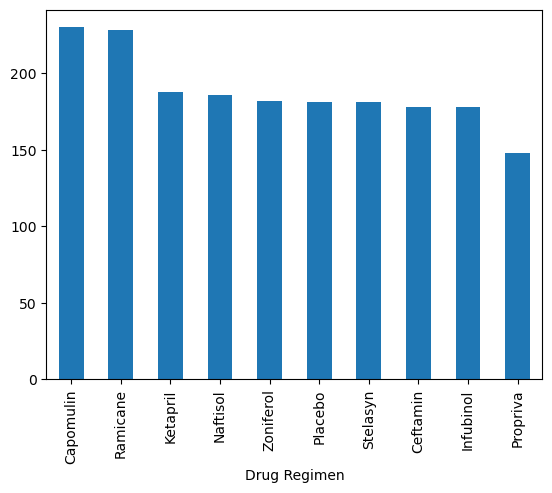

In [119]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoints_series = mice_DF.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False)

timepoints_series.plot.bar()

plt.show()



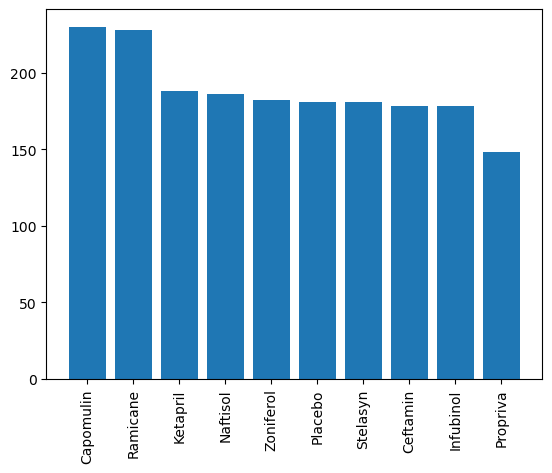

In [120]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#timepoints_panda_bar_series.values

plt.bar(timepoints_series.index, timepoints_panda_bar_series.values)
plt.xticks(rotation="vertical")
plt.show()

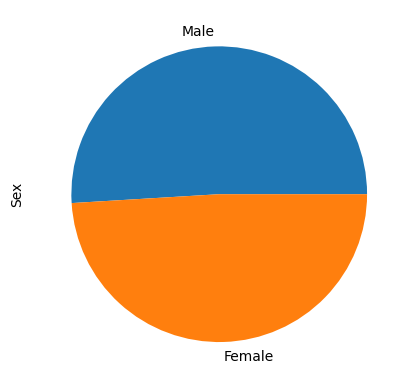

In [124]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_panda_pie_series = mice_DF.groupby("Sex")["Sex"].count().sort_values(ascending=False)

sex_panda_pie_series.plot.pie()

plt.show()


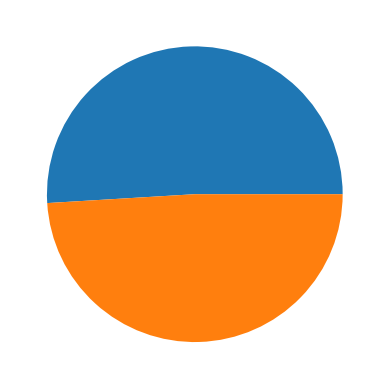

In [202]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex_panda_pie_series.values)
plt.show()


## Quartiles, Outliers and Boxplots

In [161]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_DF = mice_DF.loc[mice_DF["Drug Regimen"] == "Capomulin",:]

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_max = Capomulin_DF.groupby('Mouse ID').max()['Timepoint']


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

#Capomulin_max = Capomulin_DF.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_max)
Capomulin_merge = pd.merge(Capomulin_vol, mice_DF, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

#Capomulin_DF



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [154]:
Ramicane_DF = mice_DF.loc[mice_DF["Drug Regimen"] == "Ramicane",:]
Ramicane_max = Ramicane_DF.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_max)
Ramicane_merge = pd.merge(Ramicane_vol, mice_DF, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [159]:
Infubinol_DF = mice_DF.loc[mice_DF["Drug Regimen"] == "Infubinol",:]
Infubinol_max = Infubinol_DF.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_max)
Infubinol_merge = pd.merge(Ramicane_vol, mice_DF, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [160]:

Ceftamin_DF = mice_DF.loc[mice_DF["Drug Regimen"] == "Ceftamin",:]
Ceftamin_max = Ceftamin_DF.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_max)
Ceftamin_merge = pd.merge(Ceftamin_vol, mice_DF, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [228]:
# Put treatments into a list for for loop (and later for plot labels)

treaments = mice_DF['Drug Regimen'].unique()


# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumors = mice_DF['Tumor Volume (mm3)']

quartiles = tumors.quantile([.25,.5,.75])

lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq - lowerq

for i in treaments:
    

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

treaments
    

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

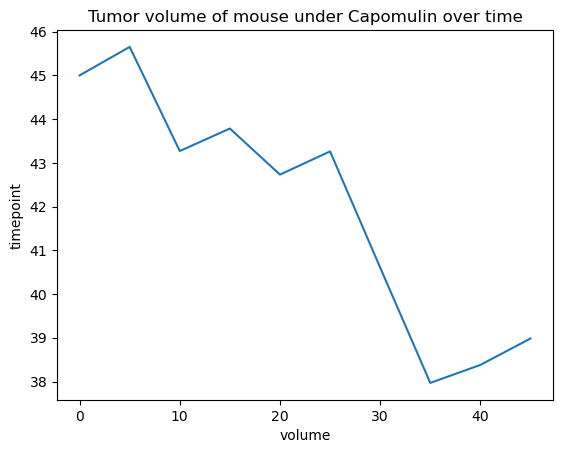

In [173]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

is_capomulin_mice_Series = mice_DF["Drug Regimen"]== "Capomulin"

mouse_ID = mice_DF[is_capomulin_mice_Series]["Mouse ID"].sample(1).values[0]

mouse_Series1 = mice_DF["Mouse ID"]== mouse_ID

mouse_Series1

single_mouse = mice_DF[mouse_Series1]

single_mouse

plt.plot(single_mouse["Timepoint"],single_mouse["Tumor Volume (mm3)"])
plt.title("Tumor volume of mouse under Capomulin over time")
plt.xlabel("volume")
plt.ylabel("timepoint")
plt.show()








In [206]:
is_capomulin_mice_Series

mouse_weight = mice_DF[is_capomulin_mice_Series]["Weight (g)"].values[0]

mouse_weight

mouse_weight_series = mice_DF.groupby("Tumor Volume (mm3)")["Weight (g)"].count().sort_values(ascending=False)

mouse_weight_DF = pd.DataFrame(mouse_weight_series)

mouse_weight_DF



,Weight (g)
Tumor Volume (mm3),
45.000000,248
22.050126,1
54.832629,1
55.076229,1
55.039020,1
...,...
47.212200,1
47.201251,1
47.196927,1


In [218]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#mouse_weight_DF = mice_DF.groupby("Tumor Volume (mm3)")["Weight (g)"].count().sort_values(ascending=False)

mouse_weight_DF.plot.scatter(x=mouse_weight_DF('Tumor Volume (mm3)'), y=mouse_weight_DF('weight (g)'))

plt.show()



TypeError: 'Series' object is not callable

## Correlation and Regression

In [220]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr=round(st.pearsonr(Capomulin_DF['Weight (g)'],Capomulin_DF['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.53
